# Aula 02: Manipulação de imagens

Uma das vantagens de se utilizar a biblioteca 'openCV' é que ela oferece funções de manipulação algébrica das imagens. Como visto no notebook anterior, ao importar uma imagem para o espaço de dados do programa em execução essa imagem passa a ser definida como uma matriz (três matrizes em uma imagem colorida). Cada interseção linha coluna da matriz é um pixel da imagem.

Em imagens preto e branco cada índice da matriz é referente à intensidade da imagem onde o valor mínimo (0) é preto e o máximo (255) é branco. Em imagens coloridas existem três matrizes referentes às cores vermelho, verde e azul. Os índices de cada matriz também são referentes à intensidade, nesse caso intensidade de cor.

Nesse notebook devemos apresentar algumas funções de edição de imagem diretamente relacionadas à manipulação de matrizes, notadamente:
1. Recorte de imagem
2. Translado de imagem
3. Rotação de imagens
4. Desenho de figuras
5. Escrita de texto na imagem
6. Modificando brilho e contraste

## 2.1 - Recorte de imagem

Para recortar uma imagem primeiramente devemos carregar essa imagem na memória em um formato manipulável. O python, ao ler um arquivo de imagem com a utilização do comando `.imread()` carrega essa imagem em formato de matriz da biblioteca `numpy`.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img/lena512.png")

Em seguida, devemos definir os limites da matrix de pixels específica dentro da nossa imagem a qual queremos recortar. Para isso , definimos os limites o ponto (x_i,y_i) e (x_f,y_f), utilizando variáveis. Como a quantidade de pixels da imagem carregada é conhecido (512x512), então podemos prosseguir da seguinte forma.

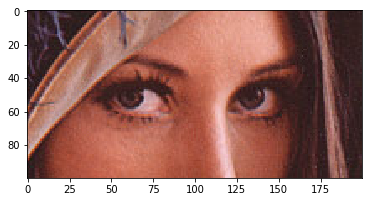

In [2]:
y_i = 220
y_f = 320
x_i = 200
x_f = 400

imagem_recortada = img[y_i:y_f, x_i:x_f]

imgRGB = cv2.cvtColor(imagem_recortada, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

Em alguma situação específica de manipulação em imagens coloridas, pode ser necessário por exemplo, modificar os valores de intensidade de uma das três matrizes de cores no espaço de cores RGB. Esse procedimento pode ser feito da seguinte forma:

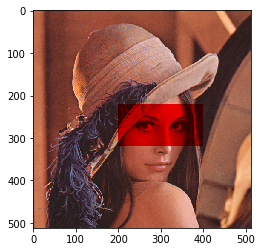

In [3]:
img2 = np.copy(img)

for x in range(x_i,x_f):
    for y in range(y_i,y_f):
        img2.itemset((y,x,0),0)
        img2.itemset((y,x,1),0)

imgRGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

Ou com a utilização de *list comprehension* (pythonic way):

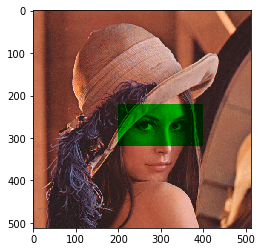

In [4]:
img2 = np.copy(img)

[img2.itemset((y,x,0),0) for x in range(x_i,x_f) for y in range(y_i,y_f)]
[img2.itemset((y,x,2),0) for x in range(x_i,x_f) for y in range(y_i,y_f)]
    
imgRGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

## 2.2 - Transladando uma imagem.
    
Uma das vantagens do `openCV` é a implementação de funções básicas de manipulação de imagens. Um bom exemplo da implementação dessas funções é a função [affine](https://en.wikipedia.org/wiki/Affine_transformation). Com a utilização dessa função é possível, por exemplo transladar uma imagem bidimensional em seus eixos (abscissas e ordenadas). A função `warpAffine()` "multiplica" a imagem original por uma matriz de translação e faz a imagem original mudar de posição.

In [5]:
# retorna as dimensões (shape) da imagem nesse caso
# como a imagem é colorida deve retornar três valores
# 0 - quantidade de pixels horizontais
# 1 - quantidade de pixels verticais
# 2 - quantidade de matrizes do espaço de cores (BRG)
print(img.shape) 

linhas = img.shape[0]
colunas = img.shape[1]

(512, 512, 3)


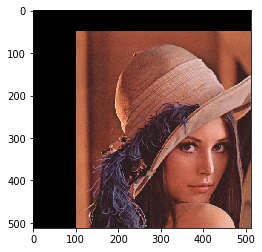

In [6]:
tx=100 #quantidade de pixels a serem transladados no eixo x
ty=50  #quantidade de pixels a serem transladados no eixo y

M = np.float32([[1,0,tx],[0,1,ty]])
imagem_transladada = cv2.warpAffine(img ,M, (colunas,linhas))

imgRGB = cv2.cvtColor(imagem_transladada, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

Além disso, a função `warpAfffine()` estabelece algumas outras matrizes de transformação, como mostrado na figura abaixo:

<img src="assets/2D_affine_transformation_matrix.png" width="300"/>

podemos portanto efetuar vários modificações na matriz 2d da imagem seguindo a mesma estrutura anterior. *Note* apenas que a matriz de modificação de entrada da função `warpAffine()` deve ser do tipo float32.

Parâmetros: `.warpAffine(imagem fonte, matriz de translação, tamanho da imagem fonte)`

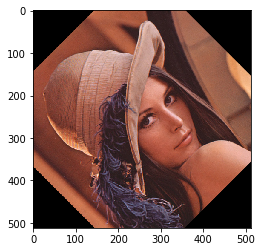

In [7]:
theta = np.pi/4
a = np.cos(theta)
b = np.sin(theta)
c = -np.sin(theta)
d = np.cos(theta)

M = np.float32([[a,b, -111],[c,d, 255]])
imagem_transladada = cv2.warpAffine(img ,M, (colunas,linhas))

imgRGB = cv2.cvtColor(imagem_transladada, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

## 2.3 - Rotacionando uma imagem.
        
A função`warpAffine()` é muito poderosa, entretanto a dificuldade de parametrizá-la é evidente. Os parâmetros de entradad dependem do tipo de manipulação que deve ser feita. Um bom exemplo é sobre como rotacionar uma figura de duas dimensões. No exemplo anterior vimos que para definir a matriz `M` de rotação é razoávelmente complicado. Para isso executar essa tarefa de forma mais fácil, o `openCV` implementa a função `.getRotationMatrix2D()` que retorna uma matriz de rotação a ser utilizada pela `.warpAffine()` à partir do ponto ao redor do qual a imagem deve rotacionar, do ângulo de rotação e da escala da imagem(zoom), que são parâmetros de entrada da função `.getRotationMatrix2D()`.
        

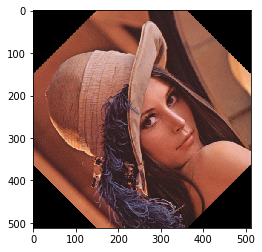

In [8]:
M = cv2.getRotationMatrix2D((colunas/2,linhas/2), 45, 1)
imagem_rotacionada = cv2.warpAffine(img, M, (colunas,linhas))

imgRGB = cv2.cvtColor(imagem_rotacionada, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

Parâmetros: `.getRotationMatrix2D((y da rotação, x da rotação), ângulo de rotação, escala da imagem)`

## 2.4 - Desenhando figuras

O esquema de armazenamento da imagem em memória de processamento utilizado pelo `openCV`, em que cada pixel é definido por um termo de uma matriz 2x2, é chamado de [mapa de bits](https://en.wikipedia.org/wiki/Bitmap) (bitmap em inglês). Esse é um formato bastante adequado para processamento digital de imagens (audio, vídeo...), pois cada termo da matriz determina um termo do espaço amostral do sinal. Em outras palavras, a *modificação* desses termos modifica diretamente a imagem mostrada.

Essa característica permite a criação de formas (linhas, polígonos, desenhos, ...) em cima da imagem simplesmente com a modificação dos pixels mostrados. Já fizemos alguns exemplos em que modificamos diretamente os pixels da matriz do mapa de pixels da imagem lena512 (aula02) e baboon (aula01). No entanto, é interessante notar que o `openCV` têm funções que facilitam a criação dessas formas na figura.

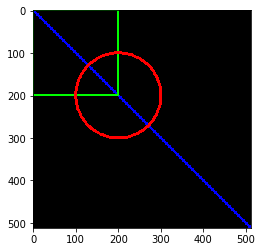

In [9]:
#Criando uma imagem preta com tamanho especificado
bg = np.zeros((512,512,3), np.uint8)
     
#Desenhando figuras
cv2.line(bg,(0,0),(511,511),(255,0,0),5)  #BGR (Y,X)
cv2.rectangle(bg,(0,0),(200,200),(0,255,0),3)
cv2.circle(bg,(200,200), 100, (0,0,255), 5)

imgRGB = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

De uma maneira diferente, podemos (tentar) recriar alguns exemplos anteriores

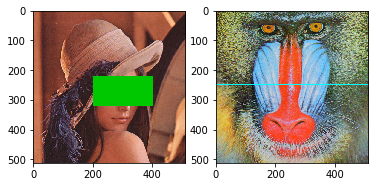

In [10]:
# y_i = 220
# y_f = 320
# x_i = 200
# x_f = 400

### lena512
bg = cv2.imread("img/lena512.png")
# cv2.rectangle(bg,(x_i,y_i),(x_f,y_f),(0,200,0),5)
cv2.rectangle(bg,(x_i,y_i),(x_f,y_f),(0,200,0),-5) # versão do retangulo com preenchimento

imgRGB = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(imgRGB)

### baboon
bg = cv2.imread("img/baboon.png")
cv2.line(bg,(0,250),(511,250),(255,255,0),2)  #BGR (Y,X)

imgRGB = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(imgRGB)

Parâmetros: 
* `.line(imagem fonte,(ponto inicial),(ponto final), cor, largura da linha)`
* `.rectangle(imagem fonte,(ponto inicial),(ponto final), cor, largura da linha)`
* `.circle(imagem fonte, centro, raio, cor, largura da linha)`

__Exemplo__:
Uma outra maneira de fazer uma *cópia* de uma das imagens da seção 2.1 é utilizando a função `.addWeighted()`, que executa a operação `dst = src1*alpha + src2*beta + gamma`.

Os parâmetros da função `.addWeighted()` são:
* `.addWeighted(overlay, alpha, bg, beta, gamma, return)`

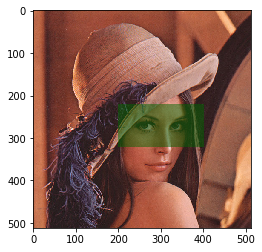

In [11]:
bg = cv2.imread("img/lena512.png")
overlay = bg.copy()

cv2.rectangle(bg,(x_i,y_i),(x_f,y_f),(0,100,0),-5)

opacity = 0.5
cv2.addWeighted(overlay, opacity, bg, 1 - opacity, 0, bg)

imgRGB = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

Apesar da imagem *parecer* a imagem de um dos exemplos da seção 2.1 elas apresentam uma diferença básica de processamento, qual é essa diferença?

## 2.5 - Escrevendo texto em uma imagem

Por ultimo, devemos mostrar a possibilidade de escrever textos em uma imagem utilizando comandos do `openCV`. Mais uma vez, é evidende que existe a possibilidade de modificarmos diretamente os pixels da imagem através da modificação dos termos da matriz que definem a imagem. Entretanto, o `openCV` já possui funções que auxiliam nessa tarefa.

Para a escrita de um texto em uma imagem podemos utilizar a função `.putText()`. Nesse caso, é necessário definir a fonte a ser utilizada. Os parâmetros dessa função são: 
* `.putText(img, texto, ponto inicial, fonte, tamanho da fonte, cor, largura, tipo da linha)`

O tipo de linha `LINE_AA` é recomendado pelo OpenCV

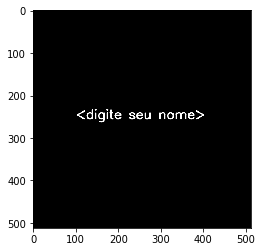

In [12]:
#Criando uma imagem preta com tamanho especificado
bg = np.zeros((512,512,3), np.uint8)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(bg,'<digite seu nome>',(100,255), font, 1,(255,255,255),2,cv2.LINE_AA)

imgRGB = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

Outras possibilidades de polígonos e figuras que podem ser desenhadas na imagem podem ser encontradas [aqui](https://docs.opencv.org/2.4.13.7/modules/core/doc/drawing_functions.html).

## 2.6 - Modificando Brilho e Contraste

O ajuste de brilho e contraste de cor é comumente efetuado com a multiplicação e soma da imagem com um valor constante (escalar):

$$
g(x)=\alpha f(x)+\beta
$$

Os parâmetros $\alpha >0$ e $\beta$, chamados de ganho e *bias* são frequentemente relacionados ao controle de contraste e brilho respectivamente. Você pode pensar em $f(x)$ como a função fonte de pixels da imagem e $g(x)$ os pixels de saída, que geram a imagem modificada. De forma conveniente, podemos reescrever a função anterior por  

$$
g(i,j)=\alpha f(i,j)+\beta
$$

onde os termos $i$ e $j$ indicam a localização do pixel na matriz de mapa de pixels.

In [13]:
from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets

img = cv2.imread("img/lena512.png")
newimg = np.zeros(img.shape, np.uint8)

def plot_func(contrast, brightness):
#     contrast = contrast/100
    # do the a*f(i,j)+b with for loop. This way we need the function np.clip
    # to clip the result between 0 and 255 values
#     for c in range(0,img.shape[2]): newimg[:,:,c] = np.clip((contrast * img[:,:,c]) + brightness, 0, 255)
        
    # an other way to do this operation is using the cv2 function convertScaleAbs()
    # wich executes the operation and converts the result to an unsigned 8-bit type
    newimg = cv2.convertScaleAbs(img, alpha=contrast, beta=brightness)

    imgRGB = cv2.cvtColor(newimg, cv2.COLOR_BGR2RGB)
    plt.imshow(imgRGB)

interact(plot_func,
        contrast=widgets.FloatSlider(min=0,max=3,step=0.01,value=1),
        brightness=widgets.FloatSlider(min=-255,max=255,step=1,value=0))

interactive(children=(FloatSlider(value=1.0, description='contrast', max=3.0, step=0.01), FloatSlider(value=0.…

<function __main__.plot_func(contrast, brightness)>